VERİLERİN LİNEER REGRESYON İLE TAHMİN EDİLMESİ

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv('data_cleaned.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      197 non-null    object
 1   city          197 non-null    object
 2   district      197 non-null    object
 3   neighborhood  197 non-null    object
 4   room          197 non-null    int64 
 5   living_room   197 non-null    int64 
 6   area          197 non-null    int64 
 7   age           197 non-null    int64 
 8   floor         197 non-null    int64 
 9   price         197 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 15.5+ KB
None


In [4]:
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['location'] = df['location'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   location      197 non-null    category
 1   city          197 non-null    category
 2   district      197 non-null    category
 3   neighborhood  197 non-null    category
 4   room          197 non-null    int64   
 5   living_room   197 non-null    int64   
 6   area          197 non-null    int64   
 7   age           197 non-null    int64   
 8   floor         197 non-null    int64   
 9   price         197 non-null    int64   
dtypes: category(4), int64(6)
memory usage: 15.5 KB
None


In [5]:
categorical_features = ['city', 'district', 'neighborhood']
numerical_features = ['room', 'living_room', 'area', 'age', 'floor']


In [6]:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [7]:
X = df.drop('price', axis=1)
y = df['price']

20 ye 80 verileri ayırdım

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Pipeline([
    ('preparation', full_pipeline),
    ('model', LinearRegression())
])

In [10]:
model.fit(X_train, y_train)

,steps,"[('preparation', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [12]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


MSE: 305450455265.7589
RMSE: 552675.723427182
R2: 0.7457680045614254


R^2 0.59  geldi yani yüzde 59'luk başarılı. 50'nin altı kötü kabul edilir


In [13]:
feature_importances = model.named_steps['model'].coef_
print(feature_importances)


[ 1.42302208e+05  0.00000000e+00  5.87001840e+05 -3.98344624e+05
  1.38390476e+05  5.49198663e-10 -1.26795943e+05 -3.12228010e+05
  7.41657150e+03 -5.61305958e+05 -4.12936189e+04  6.32084187e+05
  4.02122771e+05  1.36464876e+06 -2.23983834e+05 -6.80873399e+05
 -1.90144510e+05  9.06995107e+05  2.00872832e+05 -2.85596533e+05
  7.28999628e+05  6.71962653e+05 -1.93500823e+05  4.02122771e+05
 -3.12228010e+05 -5.89811813e+05  5.17529533e+05  4.87900510e+05
  7.47162982e+05 -2.96384131e+05 -3.59074527e+05  2.89792122e+05
  4.29440857e+05 -7.60325199e+05 -4.12936189e+04  6.36597475e+05
 -2.85890888e+05 -2.72334187e+05 -7.79236932e+05 -1.26795943e+05
  3.29795736e+05  9.97982705e+04 -1.62655934e+05  4.71173385e+04
 -6.12908369e+04  9.41810407e+04  6.60874161e+05  2.40769672e+05
  5.80887647e+05 -3.43289664e+05 -4.61650342e+05 -1.92399143e+04
 -2.02627897e+04  1.09188190e+06 -1.61152517e+06 -5.76506688e+04
 -1.64722805e+06 -4.46601922e+05 -5.61305958e+05  1.42346823e+05
  1.18497778e+05]


In [14]:
print("Numerical Features")
for i in range(len(numerical_features)):
    print(numerical_features[i], feature_importances[i])


Numerical Features
room 142302.20823188723
living_room 0.0
area 587001.8399216477
age -398344.62411225075
floor 138390.47630452644


Yukarıdaki değerler negatifse ters orantı var demektir

In [15]:
print("Categorical Features")
for i in range(len(categorical_features)):
    for j in range(len(model.named_steps['preparation'].transformers_[1][1].categories_[i])):
        print(
            model.named_steps['preparation'].transformers_[1][1].categories_[i][j],
            feature_importances[len(numerical_features) + j]
        )


Categorical Features
afyonkarahisar 5.491986628481848e-10
bolvadin 5.491986628481848e-10
cay -126795.94253362877
dinar -312228.0097635667
emirdag 7416.571497096457
ihsaniye -561305.957877774
merkez -41293.61893231044
sandikli 632084.1866745042
ali_cetinkaya 5.491986628481848e-10
ali_ihsan_pasa -126795.94253362877
battalgazi -312228.0097635667
beyazit 7416.571497096457
burmali -561305.957877774
camikebir -41293.61893231044
cumhuriyet 632084.1866745042
dervis_pasa 402122.77093571867
dortyol 1364648.7628404552
dumlupinar -223983.83391543775
ece -680873.3990623222
elbiz -190144.51033431647
erenler 906995.1074706363
erkmen_cumhuriyet 200872.8316007808
erkmen_fevzi_cakmak -285596.53278123104
erkmen_hurriyet 728999.6276450334
esentepe 671962.6530794227
esrefpasa -193500.82322763896
fatih 402122.77093571867
gazi -312228.0097635667
gazi_mehmet_cavus -589811.8126035309
gazligol_yunus_emre 517529.53344085545
guvenevler 487900.510466418
hamidiye 747162.9815097842
hattat_karahisar -296384.131255200

ÖRNEK DENEME   YÜZDE 59 BAŞARI İÇİN

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Sequence

sns.set(style="whitegrid")


def plot_metrics_bar(mse_value: float, rmse_value: float, r2_value: float) -> None:
    metrics = ["MSE", "RMSE", "R2"]
    values = [mse_value, rmse_value, r2_value]
    colors = ["#6baed6", "#9ecae1", "#31a354"]

    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=metrics, y=values, palette=colors)

    for i, v in enumerate(values):
        ax.text(i, v, f"{v:,.2f}", ha="center", va="bottom", fontsize=9)

    ax.set_title("Model Ölçütleri")
    plt.tight_layout()
    plt.show()


def plot_pred_vs_actual(y_true: Sequence[float], y_predicted: Sequence[float]) -> None:
    plt.figure(figsize=(5, 5))
    ax = sns.scatterplot(x=y_true, y=y_predicted, alpha=0.7)

    min_val = min(min(y_true), min(y_predicted))
    max_val = max(max(y_true), max(y_predicted))
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal")

    ax.set_xlabel("Gerçek Fiyat")
    ax.set_ylabel("Tahmin Fiyat")
    ax.set_title("Gerçek vs Tahmin")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_residuals(y_true: Sequence[float], y_predicted: Sequence[float]) -> None:
    residuals = np.array(y_true) - np.array(y_predicted)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_predicted, y=residuals, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--")

    plt.xlabel("Tahmin Fiyat")
    plt.ylabel("Artık (Gerçek - Tahmin)")
    plt.title("Artık (Residual) Grafiği")
    plt.tight_layout()
    plt.show()


def plot_error_distribution(y_true: Sequence[float], y_predicted: Sequence[float]) -> None:
    errors = np.array(y_predicted) - np.array(y_true)

    plt.figure(figsize=(6, 4))
    sns.histplot(errors, bins=20, kde=True, color="#fd8d3c")

    plt.xlabel("Hata (Tahmin - Gerçek)")
    plt.ylabel("Frekans")
    plt.title("Hata Dağılımı")
    plt.tight_layout()
    plt.show()


C:\Users\sema_\AppData\Local\Temp\ipykernel_39648\2707260326.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette=colors)


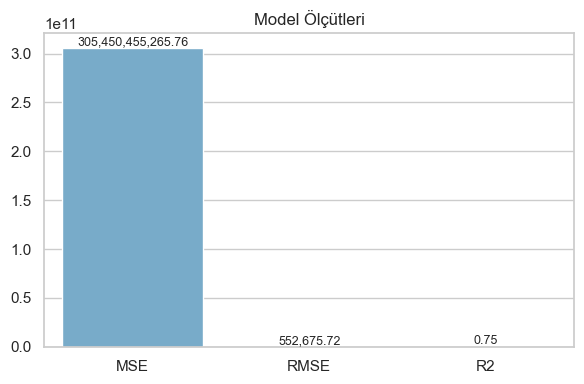

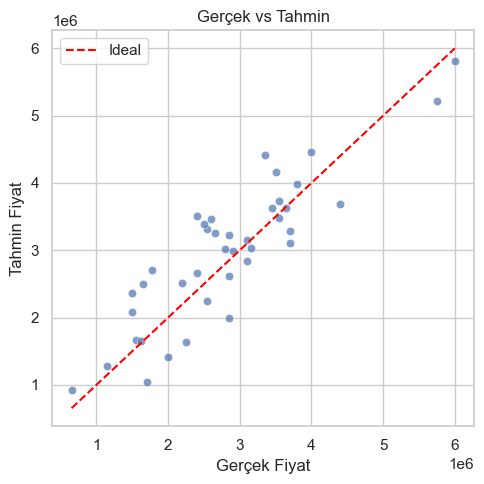

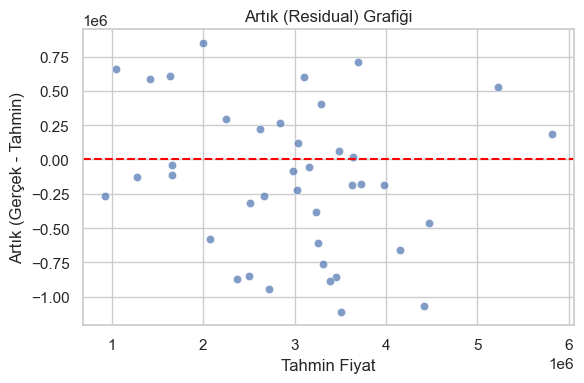

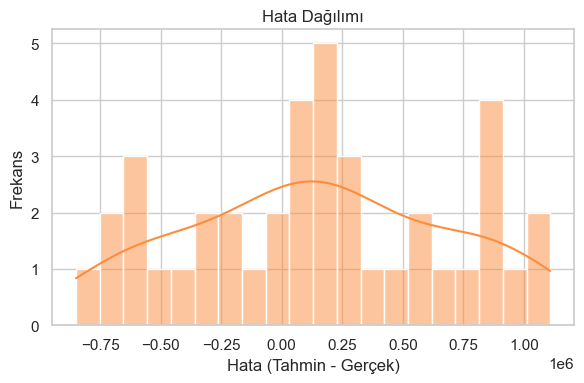

In [17]:
# Metri̇k ve grafi̇k görselleşti̇rme çağrıları
plot_metrics_bar(mse, rmse, r2)
plot_pred_vs_actual(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_error_distribution(y_test, y_pred)


In [18]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez'],
    'neighborhood': ['esentepe'],
    'room': [2],
    'living_room': [1],
    'area': [100],
    'age': [10],
    'floor': [3]
})
print(model.predict(new_data))

[2552490.16017225]


In [19]:
def tolerance_r2(y_true, y_pred, tolerance):
    residuals = y_pred - y_true
    residuals[np.abs(residuals) <= tolerance] = 0
    ssr = np.sum(residuals**2)
    sst = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ssr / sst)

def tolerance_percentage_r2(y_true, y_pred, tolerance):
    residuals = y_pred - y_true
    residuals[(np.abs(residuals) / y_true) <= tolerance] = 0
    ssr = np.sum(residuals**2)
    sst = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ssr / sst)




In [20]:
print(r2_score(y_test, y_pred))
print(tolerance_r2(y_test, y_pred, 100000))
print(tolerance_percentage_r2(y_test, y_pred, 0.10))


0.7457680045614254
0.7461193478878396
0.7588286998023775


In [21]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez'],
    'neighborhood': ['nazmi_saatçi'],
    'room': [3],
    'living_room': [1],
    'area': [115],
    'age': [23],
    'floor': [2]
})
print(model.predict(new_data))

[2752291.24429244]


In [22]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['erkmen'],
    'neighborhood': [''],
    'room': [4],
    'living_room': [1],
    'area': [165],
    'age': [0],
    'floor': [3]
})
print(model.predict(new_data))

[4213974.42772641]


In [23]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez'],
    'neighborhood': ['kanlıca'],
    'room': [2],
    'living_room': [1],
    'area': [95],
    'age': [1],
    'floor': [1]
})
print(model.predict(new_data))

[2878279.30237096]


In [24]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez_harbiş'],
    'neighborhood': ['zafer'],
    'room': [2],
    'living_room': [1],
    'area': [100],
    'age': [8],
    'floor': [4]
})
print(model.predict(new_data))

[2507908.59921759]


In [25]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez'],
    'neighborhood': ['erenler'],
    'room': [2],
    'living_room': [0],
    'area': [50],
    'age': [8],
    'floor': [4]
})
print(model.predict(new_data))

[1456257.94095136]


In [26]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez'],
    'neighborhood': ['uydukent'],
    'room': [4],
    'living_room': [1],
    'area': [170],
    'age': [0],
    'floor': [3]
})
print(model.predict(new_data))

[4943601.13979925]
